In [1]:
!pip install python_speech_features
from os import listdir
from os.path import isdir, join
import librosa
import random
import numpy as np
import matplotlib.pyplot as plt
import python_speech_features

  Created wheel for python-speech-features: filename=python_speech_features-0.6-cp37-none-any.whl size=5887 sha256=570569cd9d930976f3b15d70004a6a6c9f3509611a5b517a6966961df282540e
  Stored in directory: /root/.cache/pip/wheels/3c/42/7c/f60e9d1b40015cd69b213ad90f7c18a9264cd745b9888134be
Successfully built python-speech-features


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Dataset path and view possible targets
dataset_path = '/content/drive/MyDrive/Colab Notebooks/data_speech_commands_v0.02'
for name in listdir(dataset_path):
    if isdir(join(dataset_path, name)):
        print(name)

_background_noise_
bed
backward
bird
cat
dog
down
eight
five
follow
forward
four
go
happy
house
learn
left
marvin
nine
no
off
on
one
right
seven
sheila
six
stop
three
tree
two
up
visual
wow
yes
zero
irma


In [4]:
# Create an all targets list
all_targets = [name for name in listdir(dataset_path) if isdir(join(dataset_path, name))]
print(all_targets)

['_background_noise_', 'bed', 'backward', 'bird', 'cat', 'dog', 'down', 'eight', 'five', 'follow', 'forward', 'four', 'go', 'happy', 'house', 'learn', 'left', 'marvin', 'nine', 'no', 'off', 'on', 'one', 'right', 'seven', 'sheila', 'six', 'stop', 'three', 'tree', 'two', 'up', 'visual', 'wow', 'yes', 'zero', 'irma']


In [5]:
# Leave off background noise set
all_targets.remove('_background_noise_')
print(all_targets)

['bed', 'backward', 'bird', 'cat', 'dog', 'down', 'eight', 'five', 'follow', 'forward', 'four', 'go', 'happy', 'house', 'learn', 'left', 'marvin', 'nine', 'no', 'off', 'on', 'one', 'right', 'seven', 'sheila', 'six', 'stop', 'three', 'tree', 'two', 'up', 'visual', 'wow', 'yes', 'zero', 'irma']


In [6]:
# See how many files are in each
num_samples = 0
for target in all_targets:
    print(len(listdir(join(dataset_path, target))))
    num_samples += len(listdir(join(dataset_path, target)))
print('Total samples:', num_samples)

2014
111
2064
2031
2128
3917
3787
4053
1579
1557
3729
3880
2054
2113
1575
3801
2100
3934
3941
3745
3845
3890
3778
3998
2022
3860
3872
3727
1759
3880
3723
1592
2123
4044
4052
34
Total samples: 104312


In [7]:
# Settings
target_list = all_targets
feature_sets_file = 'all_targets_mfcc_sets.npz'
perc_keep_samples = 1.0 # 1.0 is keep all samples
val_ratio = 0.1
test_ratio = 0.1
sample_rate = 8000
num_mfcc = 16
len_mfcc = 16

In [8]:
# Create list of filenames along with ground truth vector (y)
filenames = []
y = []
for index, target in enumerate(target_list):
    print(join(dataset_path, target))
    filenames.append(listdir(join(dataset_path, target)))
    y.append(np.ones(len(filenames[index])) * index)

/content/drive/MyDrive/Colab Notebooks/data_speech_commands_v0.02/bed
/content/drive/MyDrive/Colab Notebooks/data_speech_commands_v0.02/backward
/content/drive/MyDrive/Colab Notebooks/data_speech_commands_v0.02/bird
/content/drive/MyDrive/Colab Notebooks/data_speech_commands_v0.02/cat
/content/drive/MyDrive/Colab Notebooks/data_speech_commands_v0.02/dog
/content/drive/MyDrive/Colab Notebooks/data_speech_commands_v0.02/down
/content/drive/MyDrive/Colab Notebooks/data_speech_commands_v0.02/eight
/content/drive/MyDrive/Colab Notebooks/data_speech_commands_v0.02/five
/content/drive/MyDrive/Colab Notebooks/data_speech_commands_v0.02/follow
/content/drive/MyDrive/Colab Notebooks/data_speech_commands_v0.02/forward
/content/drive/MyDrive/Colab Notebooks/data_speech_commands_v0.02/four
/content/drive/MyDrive/Colab Notebooks/data_speech_commands_v0.02/go
/content/drive/MyDrive/Colab Notebooks/data_speech_commands_v0.02/happy
/content/drive/MyDrive/Colab Notebooks/data_speech_commands_v0.02/house

In [9]:
# Check ground truth Y vector
print(y)
for item in y:
    print(len(item))

[array([0., 0., 0., ..., 0., 0., 0.]), array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1.]), array([2., 2., 2., ..., 2., 2., 2.]), array([3., 3., 3., ..., 3., 3., 3.]), array([4., 4., 4., ..., 4., 4., 4.]), array([5., 5., 5., ..., 5., 5., 5.]), array([6., 6., 6., ..., 6., 6., 6.]), array([7., 7., 7., ..., 7., 7., 7.]), array([8., 8., 8., ..., 8., 8., 8.]), array([9., 9., 9., ..., 9., 9., 9.]), array([10., 10., 10., ..., 10., 10., 10.]), array([11., 11., 11., ..., 11., 11., 11.]), array([12., 12., 12., ..., 12., 12., 12.]), array([13., 13., 13., ..., 13.

In [10]:
# Flatten filename and y vectors
filenames = [item for sublist in filenames for item in sublist]
y = [item for sublist in y for item in sublist]

In [11]:
# Associate filenames with true output and shuffle
filenames_y = list(zip(filenames, y))
random.shuffle(filenames_y)
filenames, y = zip(*filenames_y)

In [12]:
# Only keep the specified number of samples (shorter extraction/training)
filenames = filenames[:int(len(filenames) * perc_keep_samples)]
print(len(filenames))

104312


In [13]:
# Calculate validation and test set sizes
val_set_size = int(len(filenames) * val_ratio)
test_set_size = int(len(filenames) * test_ratio)

In [14]:
# Break dataset apart into train, validation, and test sets
filenames_val = filenames[:val_set_size]
filenames_test = filenames[val_set_size:(val_set_size + test_set_size)]
filenames_train = filenames[(val_set_size + test_set_size):]

In [15]:
# Break y apart into train, validation, and test sets
y_orig_val = y[:val_set_size]
y_orig_test = y[val_set_size:(val_set_size + test_set_size)]
y_orig_train = y[(val_set_size + test_set_size):]

In [17]:
# Function: Create MFCC from given path
def calc_mfcc(path):
    
    # Load wavefile
    signal, fs = librosa.load(path, sr=sample_rate)
    
    # Create MFCCs from sound clip
    mfccs = python_speech_features.base.mfcc(signal, 
                                            samplerate=fs,
                                            winlen=0.256,
                                            winstep=0.050,
                                            numcep=num_mfcc,
                                            nfilt=26,
                                            nfft=2048,
                                            preemph=0.0,
                                            ceplifter=0,
                                            appendEnergy=False,
                                            winfunc=np.hanning)
    return mfccs.transpose()

In [19]:
ppath = '/content/drive/MyDrive/Colab Notebooks/data_speech_commands_v0.02/irma/'
plist = listdir(ppath)
for p in plist:
  print(ppath + p)
  mfccs = calc_mfcc(ppath + p)
  if mfccs.shape[1] == len_mfcc:
    x_test.append(mfccs)
    y_test.append(y_orig_train[index])
  # else:
  #  print('Dropped:', index, mfccs.shape)
  #  print('Filename', filename)


/content/drive/MyDrive/Colab Notebooks/data_speech_commands_v0.02/irma/irma001.wav
/content/drive/MyDrive/Colab Notebooks/data_speech_commands_v0.02/irma/irma002.wav
/content/drive/MyDrive/Colab Notebooks/data_speech_commands_v0.02/irma/irma003.wav
/content/drive/MyDrive/Colab Notebooks/data_speech_commands_v0.02/irma/irma004.wav
/content/drive/MyDrive/Colab Notebooks/data_speech_commands_v0.02/irma/irma005.wav
/content/drive/MyDrive/Colab Notebooks/data_speech_commands_v0.02/irma/irma006.wav
/content/drive/MyDrive/Colab Notebooks/data_speech_commands_v0.02/irma/irma007.wav
/content/drive/MyDrive/Colab Notebooks/data_speech_commands_v0.02/irma/irma008.wav
/content/drive/MyDrive/Colab Notebooks/data_speech_commands_v0.02/irma/irma009.wav
/content/drive/MyDrive/Colab Notebooks/data_speech_commands_v0.02/irma/irma010.wav
/content/drive/MyDrive/Colab Notebooks/data_speech_commands_v0.02/irma/irma011.wav
/content/drive/MyDrive/Colab Notebooks/data_speech_commands_v0.02/irma/irma012.wav
/con

NameError: ignored

In [ ]:
# TEST: Construct test set by computing MFCC of each WAV file
prob_cnt = 0
x_test = []
y_test = []
print(filenames_train)
for index, filename in enumerate(filenames_train):
    print('index', index, 'filename', filename)
    # Stop after 500
    if index >= 500:
        break
    
    # Create path from given filename and target item
    path = join(dataset_path, target_list[int(y_orig_train[index])], 
                filename)
    print('path', path)
    
    # Create MFCCs
    mfccs = calc_mfcc(path)
    
    if mfccs.shape[1] == len_mfcc:
        x_test.append(mfccs)
        y_test.append(y_orig_train[index])
    else:
        print('Dropped:', index, mfccs.shape)
        print('Filename', filename)
        prob_cnt += 1
        

('a', 'c', '.', 'h', 'v', '.', '.', '.', 's', 's', 'n', 'f', '6', 'f', 'a', '0', '5', 'c', 'a', '4', 'o', '_', '6', 'o', 'h', 'o', 'e', 'h', 'w', 'h', 'd', 'a', 'f', 'h', '.', 'n', '_', 'h', 'a', 'n', 'w', '3', '_', 'f', 'a', 'a', 'v', '1', '6', 'v', 'o', '2', '3', '_', 'a', '3', '2', '_', 's', '.', '5', 'f', 'h', 'c', '8', 'h', 'v', '0', '5', '_', '4', 'a', '0', '9', 'a', 'a', 'h', 'e', '5', 's', '9', 'c', '.', '6', 's', '.', 'h', 'a', '5', 's', '7', '2', '_', '5', 'a', 'o', '3', 'a', '3', 's', 's', '0', 'v', 'a', 'c', 'a', 'd', '.', 'a', 'n', 'c', 's', 'a', 'a', 'w', 'v', 'n', 'e', 'v', '9', '4', 'w', 'h', 'd', '_', 'o', '1', 'h', '.', '0', '8', 'n', 'd', 'a', 'h', 'w', 'f', '8', 'a', '0', 's', 'w', 'a', '5', 'v', 'o', 'h', '5', 'n', '7', '2', 'a', '_', 'a', '0', '0', '2', '5', 'n', 'e', 'f', 'o', '9', 'h', 'a', 'd', '.', '_', 'a', 's', '_', '_', 's', '.', 'd', 'w', 'a', 'f', '_', 'h', 'n', 'a', 'w', 's', 'w', 'f', '1', 'h', 'h', 's', 'h', 'a', 'b', 'h', '5', '7', '0', 'a', 'o', '4',

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


FileNotFoundError: ignored

In [ ]:
print('% of problematic samples:', prob_cnt / 500)

% of problematic samples: 0.0


MFCCs: [[-8.93527768e+01 -8.97806284e+01 -8.98676304e+01 -8.98469601e+01
  -8.98004346e+01 -6.88268116e+01 -4.20328444e+01 -2.42594777e+01
  -1.55986325e+01 -9.07975351e+00 -8.33161937e+00 -1.25740861e+01
  -1.94901235e+01 -2.88556065e+01 -4.15875129e+01 -6.06106183e+01]
 [-1.45132503e-01 -2.18312822e-01  9.17724357e-02  1.26598136e-01
   1.21614077e-01 -1.25239276e+01 -2.25266362e+00  5.40512124e+00
   6.26498353e+00  2.02724182e+00  2.35477643e-01  2.59904815e-01
   1.70271020e+00  3.55161174e+00  4.81740739e+00  5.56202112e+00]
 [-3.36113882e+00 -3.54415743e+00 -3.54098774e+00 -3.28125711e+00
  -3.10403246e+00 -8.78822996e-01  1.30697292e+00 -3.67212146e+00
  -4.55874362e+00 -1.22413015e+00  2.68918737e+00  7.43155050e+00
   1.10768004e+01  1.40813647e+01  1.50700242e+01  1.11057002e+01]
 [-1.06304014e+00 -1.13839165e+00 -6.85444404e-01 -3.53494982e-01
  -2.02071230e-01  2.20191483e+00  1.88881608e+00  1.98057973e+00
   1.57945780e+00  5.42237156e-01 -3.91717050e-02 -1.32202297e+00


ImportError: ignored

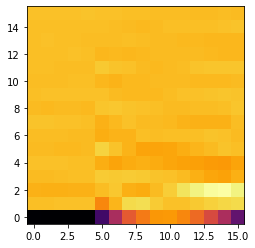

In [ ]:
# TEST: Test shorter MFCC
!pip install playsound
from playsound import playsound

idx = 13

# Create path from given filename and target item
path = join(dataset_path, target_list[int(y_orig_train[idx])], 
            filenames_train[idx])

# Create MFCCs
mfccs = calc_mfcc(path)
print("MFCCs:", mfccs)

# Plot MFCC
fig = plt.figure()
plt.imshow(mfccs, cmap='inferno', origin='lower')

# TEST: Play problem sounds
print(target_list[int(y_orig_train[idx])])
playsound(path)

In [ ]:
# Function: Create MFCCs, keeping only ones of desired length
def extract_features(in_files, in_y):
    prob_cnt = 0
    out_x = []
    out_y = []
        
    for index, filename in enumerate(in_files):
    
        # Create path from given filename and target item
        path = join(dataset_path, target_list[int(in_y[index])], 
                    filename)
        
        # Check to make sure we're reading a .wav file
        if not path.endswith('.wav'):
            continue

        # Create MFCCs
        mfccs = calc_mfcc(path)

        # Only keep MFCCs with given length
        if mfccs.shape[1] == len_mfcc:
            out_x.append(mfccs)
            out_y.append(in_y[index])
        else:
            print('Dropped:', index, mfccs.shape)
            prob_cnt += 1
            
    return out_x, out_y, prob_cnt

In [ ]:
# Create train, validation, and test sets
x_train, y_train, prob = extract_features(filenames_train, 
                                          y_orig_train)
print('Removed percentage:', prob / len(y_orig_train))
x_val, y_val, prob = extract_features(filenames_val, y_orig_val)
print('Removed percentage:', prob / len(y_orig_val))
x_test, y_test, prob = extract_features(filenames_test, y_orig_test)
print('Removed percentage:', prob / len(y_orig_test))

Streaming output truncated to the last 5000 lines.
Dropped: 38240 (16, 15)
Dropped: 38245 (16, 10)
Dropped: 38254 (16, 6)
Dropped: 38259 (16, 12)
Dropped: 38283 (16, 14)
Dropped: 38296 (16, 12)
Dropped: 38300 (16, 15)
Dropped: 38316 (16, 14)
Dropped: 38321 (16, 15)
Dropped: 38327 (16, 14)
Dropped: 38346 (16, 11)
Dropped: 38360 (16, 11)
Dropped: 38363 (16, 13)
Dropped: 38367 (16, 7)
Dropped: 38379 (16, 14)
Dropped: 38427 (16, 13)
Dropped: 38438 (16, 5)
Dropped: 38447 (16, 13)
Dropped: 38459 (16, 11)
Dropped: 38470 (16, 14)
Dropped: 38477 (16, 9)
Dropped: 38496 (16, 12)
Dropped: 38505 (16, 14)
Dropped: 38518 (16, 13)
Dropped: 38529 (16, 15)
Dropped: 38547 (16, 11)
Dropped: 38554 (16, 7)
Dropped: 38568 (16, 8)
Dropped: 38574 (16, 9)
Dropped: 38584 (16, 15)
Dropped: 38585 (16, 8)
Dropped: 38592 (16, 14)
Dropped: 38594 (16, 13)
Dropped: 38596 (16, 12)
Dropped: 38599 (16, 12)
Dropped: 38603 (16, 11)
Dropped: 38632 (16, 8)
Dropped: 38633 (16, 14)
Dropped: 38651 (16, 11)
Dropped: 38686 (16, 15

In [ ]:
# Save features and truth vector (y) sets to disk
np.savez(feature_sets_file, 
         x_train=x_train, 
         y_train=y_train, 
         x_val=x_val, 
         y_val=y_val, 
         x_test=x_test, 
         y_test=y_test)


In [ ]:
# TEST: Load features
feature_sets = np.load(feature_sets_file)
feature_sets.files

['x_train', 'y_train', 'x_val', 'y_val', 'x_test', 'y_test']

In [ ]:
len(feature_sets['x_train'])

76380

In [ ]:
print(feature_sets['y_val'])

[21.  8.  0. ...  2. 18. 25.]
